# Cleaning & transformation
This notebook performs data cleaning, data transformation and persist the result csv in gears_stage3.csv. 
## CLEANING
- 1) Data types adjustment
    - Columns: first_rental_day,return_date,price)
    - Rows: All
- 2) Remove Currency (ex. CHF 99.99 )
    - Columns: ,price
    - Rows: All
- 3) Irrelevant column values
    - Columns: gear_name (not relevant as product or a service to be rented(like "Cancellation option"))
    - Rows: 80 Rows
- 4) location_town Correction: remove Canton from gemeinde (Ex. Aeschi BE)
    - Columns: first_rental_day,return_date,price)
    - Rows: 66
- 5) String strip spaces,etc.
    - Columns: gear_name,location.location_town
    - Rows: All
- 5) String lowercase
    - Columns: gear_name
    - Rows: All
- 7) Drop irrelevant columns 
    - Columns: gear free text description (gear_description)
    - Rows: All

<b>Not handled cause OK</b>: Missing Values, Duplicates, Zero Values, Outliars

## TRANSFORM
- 1) Rent duration: Calculated  rental duration in Days
- 2) Daily Rent Price calculated: Rent price per day
- 3) Gear Class: Determine a more generic gear class the gear belong to

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Read scraped data

In [4]:
df = pd.read_csv("../Data/gears_stage1.csv", sep=',')

### basic exploration

In [5]:
df.head(4)

,location,location_town,first_rental_day,return_date,gear_name,description,price
0,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,Highest Quality & innovative technology__Direc...,CHF 49.50
1,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Ski Premium,For sporty bargain hunters__A ton of fun on th...,CHF 34.20
2,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Telemark Ski Premium,Type according to availability;,CHF 49.50
3,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Ski Economy,For the price-conscious__Type according to ava...,CHF 26.10


In [6]:
df.describe()

,location,location_town,first_rental_day,return_date,gear_name,description,price
count,1654,1654,1654,1654,1654,1654,1654
unique,44,44,1,3,74,69,288
top,Silvaplana – Graubünden,Silvaplana,2023-12-15,2023-12-15,Ski Economy,Type according to availability;,CHF 5.00
freq,69,69,1654,573,113,164,80


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   location          1654 non-null   object
 1   location_town     1654 non-null   object
 2   first_rental_day  1654 non-null   object
 3   return_date       1654 non-null   object
 4   gear_name         1654 non-null   object
 5   description       1654 non-null   object
 6   price             1654 non-null   object
dtypes: object(7)
memory usage: 90.6+ KB


## Checking if  Missing Values
There are no Missing Data so we don't have to decide if want to drop data or to decide an imputation strategy.

In [8]:
df.isnull().sum()

location            0
location_town       0
first_rental_day    0
return_date         0
gear_name           0
description         0
price               0
dtype: int64

## Duplicated: check for duplicates
No duplicated found so no need to apply a strategy for duplicates.

In [9]:
df.duplicated().sum()

0

## Data Types check


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   location          1654 non-null   object
 1   location_town     1654 non-null   object
 2   first_rental_day  1654 non-null   object
 3   return_date       1654 non-null   object
 4   gear_name         1654 non-null   object
 5   description       1654 non-null   object
 6   price             1654 non-null   object
dtypes: object(7)
memory usage: 90.6+ KB


### Change in data type needed
- first_rental_day to be casted as a DATE
- return_date to be casted as a DATE
- price to be transformed and casted as a FLOAT


In [11]:
df['first_rental_day'] = pd.to_datetime(df['first_rental_day'])


In [12]:
df['return_date'] = pd.to_datetime(df['return_date'])


In [13]:
### Price: Wrong Format and Change data type 

In [15]:
df['price'].head(3)

0    CHF 49.50
1    CHF 34.20
2    CHF 49.50
Name: price, dtype: object

As First step remove not numerics

In [16]:
# Remove non numeric
df['price'] = pd.to_numeric(df['price'].replace('[^\d.]', '', regex=True), errors='coerce')


In [17]:
df['price'].head(5)

0    49.5
1    34.2
2    49.5
3    26.1
4    17.1
Name: price, dtype: float64

### Checkt the Types afterwards

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   location          1654 non-null   object        
 1   location_town     1654 non-null   object        
 2   first_rental_day  1654 non-null   datetime64[ns]
 3   return_date       1654 non-null   datetime64[ns]
 4   gear_name         1654 non-null   object        
 5   description       1654 non-null   object        
 6   price             1654 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 90.6+ KB


In [19]:
df.head(5)

,location,location_town,first_rental_day,return_date,gear_name,description,price
0,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,Highest Quality & innovative technology__Direc...,49.5
1,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Ski Premium,For sporty bargain hunters__A ton of fun on th...,34.2
2,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Telemark Ski Premium,Type according to availability;,49.5
3,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Ski Economy,For the price-conscious__Type according to ava...,26.1
4,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Skiboots premium,Direct force transmission__High Comfort & perf...,17.1


rental duration return_date

In [20]:
df['price'].describe()

count    1654.000000
mean       46.533222
std        33.197804
min         5.000000
25%        20.700000
50%        37.600000
75%        64.950000
max       224.100000
Name: price, dtype: float64

### Double check the first_rental_day return_date 

Are there "empty" dates? From the queries we know we have  very limited set of date

In [21]:
df['first_rental_day'].unique()

<DatetimeArray>
['2023-12-15 00:00:00']
Length: 1, dtype: datetime64[ns]

In [22]:
df['return_date'].unique()

<DatetimeArray>
['2023-12-15 00:00:00', '2023-12-16 00:00:00', '2023-12-17 00:00:00']
Length: 3, dtype: datetime64[ns]

Checking "zero" values for prices

## Outliar analysis

### Investigating  max & min price rows, may be need to be investigated as outliars

Investigating on lowest value

In [23]:
df[df['price'] == df['price'].min()].head(5)

,location,location_town,first_rental_day,return_date,gear_name,description,price
10,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,Cancellation option,With the cancellation option you can cancel yo...,5.0
27,Grimentz – Valais,Grimentz,2023-12-15,2023-12-16,Cancellation option,With the cancellation option you can cancel yo...,5.0
44,Grimentz – Valais,Grimentz,2023-12-15,2023-12-17,Cancellation option,With the cancellation option you can cancel yo...,5.0
57,Les Collons Thyon – Valais,Les Collons Thyon,2023-12-15,2023-12-15,Cancellation option,With the cancellation option you can cancel yo...,5.0
67,Les Collons Thyon – Valais,Les Collons Thyon,2023-12-15,2023-12-16,Cancellation option,With the cancellation option you can cancel yo...,5.0


### Cancellation option to be removed as it is not a product or a service to rent

In [24]:
df[df['gear_name'] =='Cancellation option'].count()[0]

80

In [25]:
df[df['gear_name'] =='Cancellation option'].count()

location            80
location_town       80
first_rental_day    80
return_date         80
gear_name           80
description         80
price               80
dtype: int64

In [26]:
df = df[df['gear_name'] != 'Cancellation option']

In [27]:
df[df['price'] == df['price'].min()].head(5)

,location,location_town,first_rental_day,return_date,gear_name,description,price
93,La Dôle – Canton of Vaud,La Dôle,2023-12-15,2023-12-15,Skating shoes,Suitable for skating rinks & natural ice.__For...,5.4
404,La Punt – Graubünden,La Punt,2023-12-15,2023-12-15,Skating shoes,Suitable for skating rinks & natural ice.__For...,5.4
626,La Roche - La Berra – Region of Fribourg,La Roche - La Berra,2023-12-15,2023-12-15,Skating shoes,Suitable for skating rinks & natural ice.__For...,5.4
695,La Forclaz VS – Valais,La Forclaz VS,2023-12-15,2023-12-15,Skating shoes,Suitable for skating rinks & natural ice.__For...,5.4
764,Bad Ragaz – Eastern Switzerland / Liechtenstein,Bad Ragaz,2023-12-15,2023-12-15,Ski helmet,Optimal wearing comfort__Perfect protection__V...,5.4


In [28]:
df[df['gear_name'] =='Cancellation option'].count()[0]

0

In [29]:
df[df['price'] == df['price'].min()].head(5)

,location,location_town,first_rental_day,return_date,gear_name,description,price
93,La Dôle – Canton of Vaud,La Dôle,2023-12-15,2023-12-15,Skating shoes,Suitable for skating rinks & natural ice.__For...,5.4
404,La Punt – Graubünden,La Punt,2023-12-15,2023-12-15,Skating shoes,Suitable for skating rinks & natural ice.__For...,5.4
626,La Roche - La Berra – Region of Fribourg,La Roche - La Berra,2023-12-15,2023-12-15,Skating shoes,Suitable for skating rinks & natural ice.__For...,5.4
695,La Forclaz VS – Valais,La Forclaz VS,2023-12-15,2023-12-15,Skating shoes,Suitable for skating rinks & natural ice.__For...,5.4
764,Bad Ragaz – Eastern Switzerland / Liechtenstein,Bad Ragaz,2023-12-15,2023-12-15,Ski helmet,Optimal wearing comfort__Perfect protection__V...,5.4


<Axes: >

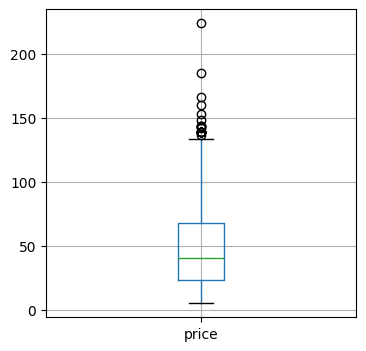

In [30]:
df.boxplot(column='price', figsize=(4, 4))

Some higher prices may be  indeed outliars,need to be

In [31]:
df[df['price'] > 150]

,location,location_town,first_rental_day,return_date,gear_name,description,price
314,Silvaplana – Graubünden,Silvaplana,2023-12-15,2023-12-16,Ski set Premium,"Skiset (ski, boots, poles)__Perfect run at hig...",153.0
337,Silvaplana – Graubünden,Silvaplana,2023-12-15,2023-12-17,Ski set Premium,"Skiset (ski, boots, poles)__Perfect run at hig...",224.1
339,Silvaplana – Graubünden,Silvaplana,2023-12-15,2023-12-17,Ski Exclusive,Highest Quality & innovative technology__Direc...,166.5
603,Villars-sur-Ollon – Canton of Vaud,Villars-sur-Ollon,2023-12-15,2023-12-17,Touring Set Premium,"Set includes alpine touring skis, poles, skins...",185.4
1462,Homberg b. Thun – Bern Region,Homberg b. Thun,2023-12-15,2023-12-16,Touring Set Standard,"Set includes alpine touring skis, poles, skins...",160.0


Although it looks like an outliar , have to consider that are rent over multiple days and it looks like not  outliars but indeed an Hihgh End Offering

### Strip strings

In [32]:
(df['location_town'].str.len() != df['location_town'].str.strip().str.len()).sum()


1574

In [33]:
(df['location'].str.len() != df['location'].str.strip().str.len()).sum()


0

In [34]:
(df['gear_name'].str.len() != df['gear_name'].str.strip().str.len()).sum()


0

In [35]:
df['location_town'] = df['location_town'].str.strip()

In [36]:
#corrected
(df['location_town'].str.len() != df['location_town'].str.strip().str.len()).sum()


0

### Location Town:  correction of values

In [37]:
df['location_town'].unique()

array(['Grimentz', 'Les Collons Thyon', 'La Dôle', 'Mürren', 'Laax',
       'St-Luc', 'St. Moritz', 'Arosa', 'Silvaplana', 'Sils i.E.',
       'La Punt', 'Gstaad', 'Scuol', 'Les Diablerets',
       'Villars-sur-Ollon', 'La Roche - La Berra', 'Veysonnaz',
       'La Forclaz VS', 'Vercorin', 'Bad Ragaz', 'Obersaxen Mundaun',
       'La Fouly', 'Les Mosses', 'Les Marécottes', 'Aletsch Arena',
       'Samnaun', 'Münster (Goms)', 'Les Breuleux', "Les Prés d'Orvin",
       'Schwyz', 'Andermatt', 'Vals', 'Oberwil i.S.', 'Sörenberg',
       'Le Sentier', 'Buttes La Robella', 'St. Peter',
       'Schwanden ob Sigriswil', 'Homberg b. Thun', 'Aeschi BE',
       'Sainte-Croix Les Rasses', 'Les Paccots', 'Küssnacht am Rigi',
       'Rathvel s/Châtel-St-Denis'], dtype=object)

### Remove canton from location_town
In some cases the canton is still in the location_town


In [38]:
def correct_misspelling(location):
    """ Correct the misspelling in the location
        if canton appears at the end of the string remove it 
    """
    cantons = ['AG', 'AI', 'AR', 'BE', 'BL', 'BS', 'FR', 'GE', 'GL', 'GR', 'JU', 'LU', 'NE', 'NW', 'OW', 'SG', 'SH', 'SO', 'SZ', 'TG', 'TI', 'UR', 'VD', 'VS', 'ZG', 'ZH']
    for canton in cantons:
        if location.endswith(f' {canton}'):
            return location.replace(f' {canton}','').strip()
    return location.strip()   

#example
location = "abbaBEBern BE"
print(correct_misspelling(location))

abbaBEBern


In [39]:
#Apply correction
corrected_location = df['location_town'].apply( correct_misspelling)


In [40]:
df['location_town'] = corrected_location

In [41]:
df['location_town'].unique()

array(['Grimentz', 'Les Collons Thyon', 'La Dôle', 'Mürren', 'Laax',
       'St-Luc', 'St. Moritz', 'Arosa', 'Silvaplana', 'Sils i.E.',
       'La Punt', 'Gstaad', 'Scuol', 'Les Diablerets',
       'Villars-sur-Ollon', 'La Roche - La Berra', 'Veysonnaz',
       'La Forclaz', 'Vercorin', 'Bad Ragaz', 'Obersaxen Mundaun',
       'La Fouly', 'Les Mosses', 'Les Marécottes', 'Aletsch Arena',
       'Samnaun', 'Münster (Goms)', 'Les Breuleux', "Les Prés d'Orvin",
       'Schwyz', 'Andermatt', 'Vals', 'Oberwil i.S.', 'Sörenberg',
       'Le Sentier', 'Buttes La Robella', 'St. Peter',
       'Schwanden ob Sigriswil', 'Homberg b. Thun', 'Aeschi',
       'Sainte-Croix Les Rasses', 'Les Paccots', 'Küssnacht am Rigi',
       'Rathvel s/Châtel-St-Denis'], dtype=object)

In [42]:
grouped_counts = df.groupby(['gear_name', 'description']).size().reset_index(name='count')


In [43]:
sorted_grouped_counts = grouped_counts.sort_values(by='count', ascending=False)

In [44]:
sorted_grouped_counts.head(10)

,gear_name,description,count
20,Helmet,Perfect fitting comfort__Perfect protection__C...,77
32,Ski Economy,For the price-conscious__Type according to ava...,72
49,Skiboots economy,Allround ski boot__Comfortable wearing__Excell...,71
36,Ski Premium,For sporty bargain hunters__A ton of fun on th...,71
68,Snowboard boots economy,Easy entry & exit__Safe stand__Best processing...,62
33,Ski Exclusive,Highest Quality & innovative technology__Direc...,54
51,Skiboots premium,Direct force transmission__High Comfort & perf...,52
62,Snowboard Economy,Perfect for all levels__Tolerance for failures...,47
28,Ski Budget,Type according to availability;,47
42,Ski jacket and ski pants,Best fit & extremely comfortable__Wonderfully ...,44


### Lower case
Lower case not to remove duplicates but just for harmonisation

In [45]:
(df['gear_name'].str.lower().str.len() != df['gear_name'].str.len()).sum()


0

In [46]:
df['gear_name'] = df['gear_name'].str.lower()


### Drop  not necessary columns
### Description is. a generic free text will be not used for the analsis

In [47]:
df.drop('description', axis=1, inplace=True)


In [48]:
df.head(5)

,location,location_town,first_rental_day,return_date,gear_name,price
0,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,ski exclusive,49.5
1,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,ski premium,34.2
2,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,telemark ski premium,49.5
3,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,ski economy,26.1
4,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,skiboots premium,17.1


## TRANSFORM
- 1) rent duration:
    - The query uses specific dates, here we want the rent duration in days
- 2) rent price per day calculated
    - The price from scraping is for the full rental period interesting is the per day price 
- 3) Gear Class
    -  the gear name clearly states the type of gear or service, but for AGGREGATED selection 
       would be nice to determine a more generic gear class

In [50]:
df['rental_duration'] = 1 + (df['return_date'] - df['first_rental_day']).dt.days


In [51]:
df['price_per_day'] = df['price'] / df['rental_duration']


### GEAR_CLASS(new field): In the first step we remove words that specify service level or other details (economy,premum)

In [52]:
df['gear_name'].unique() #explore gear names

array(['ski exclusive', 'ski premium', 'telemark ski premium',
       'ski economy', 'skiboots premium', 'skiboots economy',
       'alpine touring ski boots', 'telemark skiboots',
       'touring ski exklusiv', 'split board', 'snowboard exclusive',
       'snowboard premium', 'snowboard boots economy',
       'nordic set classic', 'snowshoes', 'helmet', 'ski budget',
       'snowboard budget', 'ski superior', 'alpine touring ski',
       'ski jacket and ski pants', 'ski helmet', 'snowboard economy',
       'snowboard boots premium', 'snowblades', 'snow shoes incl. poles',
       'skating shoes', 'ski set economy', 'ski test',
       'skiing jacket adult', 'skiing pants adult',
       'snowboardboots premium', 'toboggan', 'sledges', 'ski set premium',
       'touring set premium', 'touring ski premium', 'jacket / pants',
       'nordic set skating', 'ski poles', 'alpine economy touring ski',
       'back protection (shield)', 'comfort depot box 2 persons',
       'alpine touring ski su

In [53]:
df['gear_class'] = df['gear_name']

specific_keywords = ['economy','premium','budget','exclusive','superior','alpine','touring','nordic',
               'carving','classic','telemark','exklusiv','adult']

# Trying to harmonises gear classes by removing specific wordds like budget/economy etc...
for specific_keyword in specific_keywords:
    df['gear_class'] = df['gear_class'].str.lower().str.replace(specific_keyword, "").str.strip()



In [54]:
df['gear_class'].unique()

array(['ski', 'skiboots', 'ski boots', 'split board', 'snowboard',
       'snowboard boots', 'set', 'snowshoes', 'helmet',
       'ski jacket and ski pants', 'ski helmet', 'snowblades',
       'snow shoes incl. poles', 'skating shoes', 'ski set', 'ski test',
       'skiing jacket', 'skiing pants', 'snowboardboots', 'toboggan',
       'sledges', 'jacket / pants', 'set skating', 'ski poles',
       'back protection (shield)', 'comfort depot box 2 persons', '',
       'skating set', 'ski  boots', 'back protector',
       'carefree package ski', 'carefree package snowboard',
       'snowshoes with poles', 'ski boot', 'freerideski',
       'avalanche tranceiver', 'safety set', 'shortcarver', 'sledge',
       'skis  + crampons', 'set standard', 'cross-country skiing boots'],
      dtype=object)

### GEAR_CLASS(new field): In the second step we remove words that specify service level or other details (economy,premum)


In [437]:
# define rules as 
#                dict KEY = TARGET GEAR_CLASS
#                dict VALUES: words that if found in GEAR_NAME determine the GEAR_CLASS

business_rules = [
    {"services":['package','depo']},
    {"clothes": ['shoes','jacket','back','boot','pants']},
    {"other": ['tranceiver']},
    {"helmet": ['helmet']},
    {"set": ['set']},
    {"ski": ['ski','shortcarver','snowblades']},
    {"snowboard": ['snowboard','split board']},
    {"sledge": ['sledge','toboggan']},
    
]
#Business Rule lambda function implementation
business_rules_function = lambda x: gear_class if any(word in x.lower() for word in words) else x

#APPLY ALL BUSINESS RULE
for business_rule in business_rules:
    for gear_class,words in business_rule.items():
        df['gear_class'] = df['gear_class'].apply(business_rules_function)
        
#in case of empyty strings        
df['gear_class'] = df['gear_class'].apply(lambda x: 'other' if x == '' else x)




In [438]:
df['gear_class'].unique()

array(['ski', 'clothes', 'snowboard', 'set', 'helmet', 'sledge',
       'services', 'other'], dtype=object)

In [439]:
df.head(50).tail(3)

,location,location_town,first_rental_day,return_date,gear_name,price,rental_duration,price_per_day,gear_class
50,Grimentz – Valais,Grimentz,2023-12-15,2023-12-17,helmet,27.9,3,9.3,helmet
51,Les Collons Thyon – Valais,Les Collons Thyon,2023-12-15,2023-12-15,ski exclusive,53.1,1,53.1,ski
52,Les Collons Thyon – Valais,Les Collons Thyon,2023-12-15,2023-12-15,ski premium,53.1,1,53.1,ski


In [440]:
df['gear_class'].value_counts()

clothes      561
ski          532
snowboard    196
helmet       121
set           98
sledge        34
other         23
services       9
Name: gear_class, dtype: int64

### persist cleaned and enriched data

In [215]:
df.to_csv('../Data/gears_stage3.csv', index=False)


In [441]:
df.head(10)

,location,location_town,first_rental_day,return_date,gear_name,price,rental_duration,price_per_day,gear_class
0,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,ski exclusive,49.5,1,49.5,ski
1,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,ski premium,34.2,1,34.2,ski
2,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,telemark ski premium,49.5,1,49.5,ski
3,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,ski economy,26.1,1,26.1,ski
4,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,skiboots premium,17.1,1,17.1,clothes
5,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,skiboots economy,13.5,1,13.5,clothes
6,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,alpine touring ski boots,17.1,1,17.1,clothes
7,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,telemark skiboots,17.1,1,17.1,clothes
8,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,touring ski exklusiv,49.5,1,49.5,ski
9,Grimentz – Valais,Grimentz,2023-12-15,2023-12-15,split board,49.5,1,49.5,snowboard
